# U.S. Medical Insurance Costs

In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

To start, all necessary libraries must be imported. For this project the only library needed is the `csv` library in order to work with the **insurance.csv** data. There are other potential libraries that could help with this project; however, for this analysis, using just the `csv` library will suffice.

The next step is to look through **insurance.csv** in order to get aquanted with the data. The following aspects of the data file will be checked in order to plan out how to import the data into a Python file:
* The names of columns and rows
* Any noticeable missing data
* Types of values (numerical vs. categorical)

**insurance.csv** contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geographical Region
* Patient Yearly Medical Insurance Cost


### This dataset could be valuable for analyzing factors that influence medical insurance costs and making predictions about future insurance costs. Here's a breakdown of the dataset:

#### Patient Age: 
The age of the insured individuals. Age often plays a significant role in determining insurance premiums because older individuals may have higher healthcare needs.

#### Sex: 
The gender of the insured individuals. Gender can sometimes affect insurance costs due to differences in healthcare utilization patterns.

#### BMI (Body Mass Index): 
A measure of an individual's body fat based on height and weight. BMI can be a factor in determining insurance costs, as it may be associated with certain health conditions.

#### Number of Children: 
The number of dependent children covered by the insurance policy. Family size can impact the cost of coverage.

#### Smoking Status: 
Indicates whether the insured individuals are smokers or non-smokers. Smokers often face higher insurance premiums due to the increased health risks associated with smoking.

#### Geographical Region: 
The region or state within the United States where the insured individuals reside. Healthcare costs and insurance regulations can vary by region, leading to differences in insurance costs.

#### Yearly Medical Insurance(charges): 
The annual medical insurance cost or premium that the insured individuals are required to pay for their coverage.

### Load Liberies

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [331]:
# Reading in the csv file 

insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [64]:
# Running the first ten dataset

insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Running the last ten dataset

insurance.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


### Manipulating the DataFrame

In [5]:
# Figuring the number of columns and rows

insurance.shape

(1338, 7)

In [6]:
# Inspecting the names of the columns

insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# Information about the dataset,inspecting the data type and count

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# describing the dataset(descriptive analysis)

insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
# the maximum of all colunmns in the dataset

insurance.max()

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

In [15]:
# the minimum of all colunmns in the dataset

df.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object

In [16]:
# the unique values in the region column

insurance["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
# the unique values in the age column

insurance["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [18]:
# the unique values in the children column

insurance["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [19]:
# the unique values in the sex column

insurance["sex"].unique()

array(['female', 'male'], dtype=object)

In [22]:
# the value count in the region column

insurance["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [23]:
# the value count in the sex column

insurance["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [24]:
# the value count in the smoker column

insurance["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [25]:
# Smokers normalization value count

insurance["smoker"].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [309]:
# the value count in the children column

insurance["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [308]:
# the value count in the age column

insurance['age'].value_counts().T

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

### Cleaning the Data

In [27]:
# Inspecting there sum of null values

insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
# Looking out for duplicate values

insurance.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [4]:
# Inspecting if there is any null value

insurance.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


### Data Aggregate Function

In [32]:
# Let's group the dataset by the max of children 

insurance.groupby('children').max()

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,64,male,53.13,yes,southwest,63770.42801
1,64,male,52.58,yes,southwest,58571.07448
2,64,male,48.07,yes,southwest,49577.66240
3,64,male,46.53,yes,southwest,60021.39897
4,61,male,41.47,yes,southwest,40182.24600
5,52,male,46.75,yes,southwest,19023.26000


In [33]:
# Let's group the dataset by the max of sex

insurance.groupby('sex').max()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,64,48.07,5,yes,southwest,63770.42801
male,64,53.13,5,yes,southwest,62592.87309


In [4]:
# Let's group the dataset by the max of smoker

insurance.groupby('smoker').max()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,64,male,53.13,5,southwest,36910.60803
yes,64,male,52.58,5,southwest,63770.42801


In [5]:
# Let's group the dataset by the min of children

insurance.groupby('children').min()

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,18,female,15.960,no,northeast,1121.8739
1,18,female,16.815,no,northeast,1711.0268
2,18,female,16.815,no,northeast,2304.0022
3,18,female,18.905,no,northeast,3443.0640
4,18,female,24.415,no,northeast,4504.6624
5,19,female,18.300,no,northeast,4687.7970


In [6]:
# Let's group the dataset by the min of sex

insuranc.groupby('sex').min()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,18,16.815,0,no,northeast,1607.5101
male,18,15.960,0,no,northeast,1121.8739


In [38]:
# Let's group the dataset by the min of smoker

insurance.groupby('smoker').min()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,18,female,15.960,0,northeast,1121.8739
yes,18,female,17.195,0,northeast,12829.4551


In [45]:
# Let's figure out the details of patients that are sixty four and above

age = insurance[(insurance.age >= 64)]
age

,age,sex,bmi,children,smoker,region,charges
62,64,male,24.700,1,no,northwest,30166.61817
94,64,female,31.300,2,yes,southwest,47291.05500
199,64,female,39.330,0,no,northeast,14901.51670
328,64,female,33.800,1,yes,southwest,47928.03000
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785
398,64,male,25.600,2,no,southwest,14988.43200
402,64,female,32.965,0,no,northwest,14692.66935
418,64,male,39.160,1,no,southeast,14418.28040
420,64,male,33.880,0,yes,southeast,46889.26120


#### Average Insurance Costs by Age Group:
● Calculate the average yearly medical insurance costs for different age groups. This can help you understand how insurance costs tend to increase with age.

In [202]:
average_costs_by_age_group = pd.pivot_table(insurance,index='age', values= 'charges')
average_costs_by_age_group

,charges
age,
0-20,8713.482413
21-30,9806.025289
31-40,11639.308653
41-50,14782.043077
51-60,17062.292763
61+,21063.163398


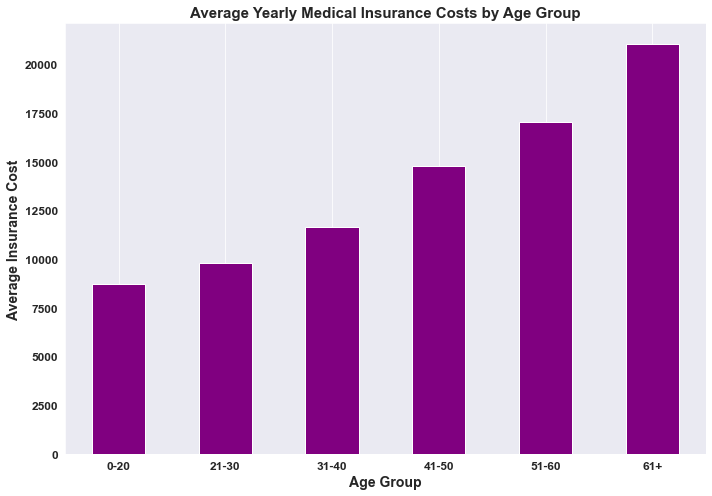

In [248]:
# Plot the results
plt.figure(figsize=(10, 7))
average_costs_by_age_group.plot(kind='bar', color='purple')
plt.title('Average Yearly Medical Insurance Costs by Age Group',fontsize=15, fontweight='bold')
plt.xlabel('Age Group',fontsize=14, fontweight='bold')
plt.ylabel('Average Insurance Cost',fontsize=14, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#### Gender-Based Analysis:
● Compare the average insurance costs between males and females. Determine if there are significant gender-based differences in insurance premiums.

In [249]:
# Determine if there are significant gender-based differences in insurance premiums.
average_insurance_cost= pd.pivot_table(insurance,index='sex', values='charges')
average_insurance_cost

,charges
sex,
female,12569.578844
male,13956.751178


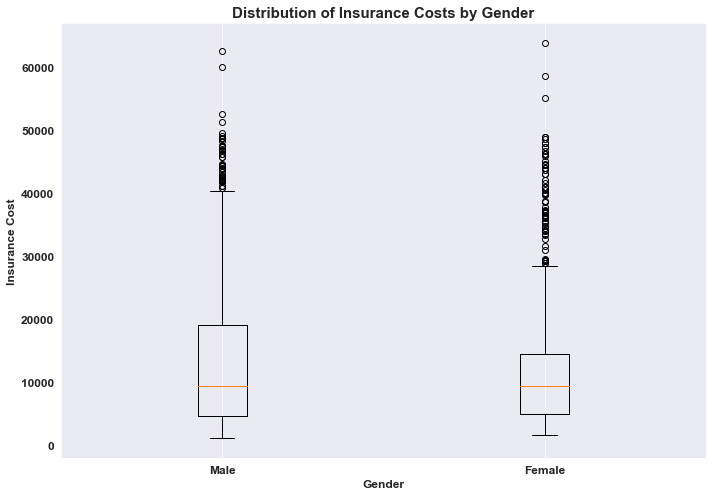

There are significant gender-based differences in insurance premiums.


In [290]:
# Separate insurance costs for males and females
male_insurance_costs = insurance[insurance['sex'] == 'male']['charges']
female_insurance_costs = insurance[insurance['sex'] == 'female']['charges']

# Perform a t-test to compare means
t_stat, p_value = ttest_ind(male_insurance_costs, female_insurance_costs)

# Define the significance level (alpha)
alpha = 0.05

# Plot a box plot to visualize the distribution of insurance costs by gender
plt.figure(figsize=(10, 7))
plt.boxplot([insurance_costs_males, insurance_costs_females], labels=['Male', 'Female'])
plt.title('Distribution of Insurance Costs by Gender',fontsize=15, fontweight='bold')
plt.xlabel('Gender',fontsize=12, fontweight='bold')
plt.ylabel('Insurance Cost',fontsize=12, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Determine if there are significant gender-based differences in insurance premiums
if p_value < alpha:  
    print("There are significant gender-based differences in insurance premiums.")
else:
    print("There are no significant gender-based differences in insurance premiums.")


#### BMI and Insurance Costs:
● Examine the relationship between BMI and insurance costs. You can group individuals into BMI categories (e.g., underweight, normal weight, overweight, obese) and analyze how BMI affects insurance premiums.

#### Smoking and Insurance Costs:
● Investigate how smoking status influences insurance costs. Compare the average costs for smokers and non-smokers and identify the impact of smoking on premiums.

In [234]:
# Calculate the average insurance costs for smokers and non-smokers
average_costs= pd.pivot_table(insurance,index='smoker', values= 'charges')
average_costs

,charges
smoker,
no,8434.268298
yes,32050.231832


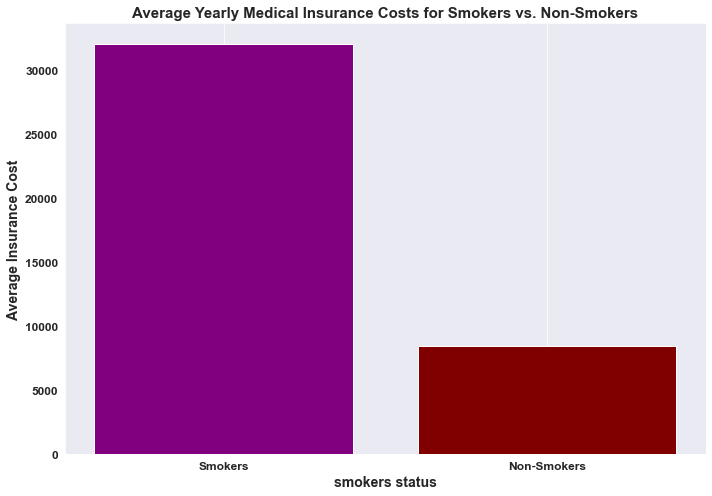

Average Insurance Cost for Smokers: $32050.23
Average Insurance Cost for Non-Smokers: $8434.27


In [277]:
# Create two subsets: one for smokers and one for non-smokers
smokers = insurance[insurance['smoker'] == 'yes']
non_smokers = insurance[insurance['smoker'] == 'no']

# Calculate the average insurance cost for smokers and non-smokers
average_cost_smokers = smokers['charges'].mean()
average_cost_non_smokers = non_smokers['charges'].mean()

# Create a bar chart to visualize the difference
plt.figure(figsize=(10, 7))
plt.bar(['Smokers', 'Non-Smokers'], [average_cost_smokers, average_cost_non_smokers], color=['purple', 'maroon'])
plt.title('Average Yearly Medical Insurance Costs for Smokers vs. Non-Smokers',fontsize=15, fontweight='bold')
plt.xlabel('smokers status',fontsize=14, fontweight='bold')
plt.ylabel('Average Insurance Cost',fontsize=14, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print the results
print(f'Average Insurance Cost for Smokers: ${average_cost_smokers:.2f}')
print(f'Average Insurance Cost for Non-Smokers: ${average_cost_non_smokers:.2f}')


#### Family Size and Insurance Costs:
● Explore how the number of children covered by insurance impacts yearly medical insurance costs. Determine if larger families tend to have higher insurance costs.

In [197]:
children_average_cost = pd.pivot_table(insurance,index='children', values='charges')
children_average_cost

,charges
children,
0,12365.975602
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


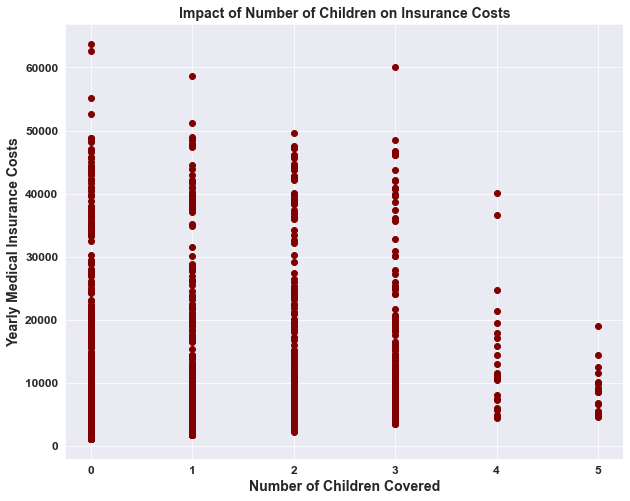

In [276]:
# Scatter plotto visualize the impact of number 'children' and 'insurance_cost'
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
plt.scatter(insurance['children'], insurance['charges'],color='maroon')
plt.xlabel('Number of Children Covered',fontsize=14, fontweight='bold')
plt.ylabel('Yearly Medical Insurance Costs',fontsize=14, fontweight='bold')
plt.title('Impact of Number of Children on Insurance Costs',fontsize=14, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')
plt.show()


We calculate and print the correlation coefficient using corr() to measure the strength and direction of the 
linear relationship between the variables. A positive correlation suggests that larger families tend to have 
higher insurance costs if the coefficient is close to 1.

In [191]:
# Calculate correlation coefficient (optional)
correlation_coefficient = insurance['children'].corr(insurance['charges'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.0679982268479048


#### Geographical Variation:
● Analyze how insurance costs vary by geographical region. Identify regions with the highest and lowest insurance premiums.

In [196]:
average_premium = pd.pivot_table(insurance,index='region', values= 'charges')
average_premium

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


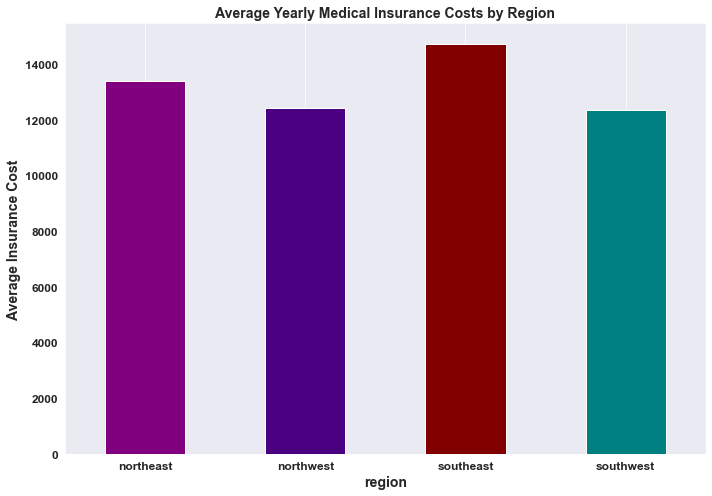

Region with Highest Premium: southeast (Average Premium: $14735.41)
Region with Lowest Premium: southwest (Average Premium: $12346.94)


In [282]:
# Group the data by region and calculate the mean insurance cost for each region
average_costs_by_region = insurance.groupby('region')['charges'].mean()

# Find the region with the highest insurance premium
highest_premium_region = average_costs_by_region.idxmax()
highest_premium = average_costs_by_region.max()

# Find the region with the lowest insurance premium
lowest_premium_region = average_costs_by_region.idxmin()
lowest_premium = average_costs_by_region.min()

# Plot the results
plt.figure(figsize=(10, 7))
mean_costs.plot(kind='bar', color=['purple','indigo','maroon','teal'])
plt.title('Average Yearly Medical Insurance Costs by Region',fontsize=14, fontweight='bold')
plt.xlabel('region',fontsize=14, fontweight='bold')
plt.ylabel('Average Insurance Cost',fontsize=14, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print the regions with the highest and lowest insurance premiums
print(f"Region with Highest Premium: {highest_premium_region} (Average Premium: ${highest_premium:.2f})")
print(f"Region with Lowest Premium: {lowest_premium_region} (Average Premium: ${lowest_premium:.2f})")


#### Number of Children and Their Region
● Analyze how number of children vary by geographical region. Identify regions with the highest and lowest numcer of children.

In [336]:
pd.pivot_table(insurance,index='region', values='children')

,children
region,
northeast,1.046296
northwest,1.147692
southeast,1.049451
southwest,1.141538


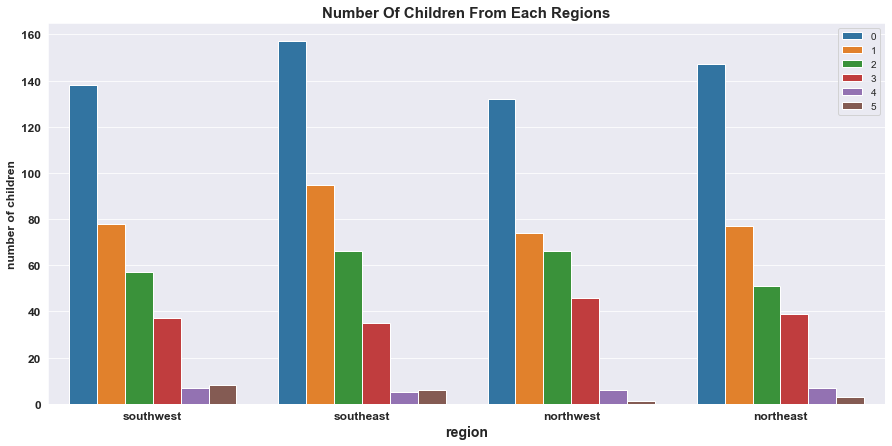

In [343]:
plt.figure(figsize=(15, 7))
sns.countplot(x='region', data=insurance, hue='children') #order=order)
plt.title('Number Of Children From Each Regions', fontsize=15, fontweight='bold')
plt.xlabel('region',fontsize=14, fontweight='bold')
plt.ylabel('number of children',fontsize=12, fontweight='bold')
plt.legend(loc='upper right')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')

# show thw plot
plt.show()

#### Gender and Children
● compare how number of children vary among male and female. Identify  gender with more children.

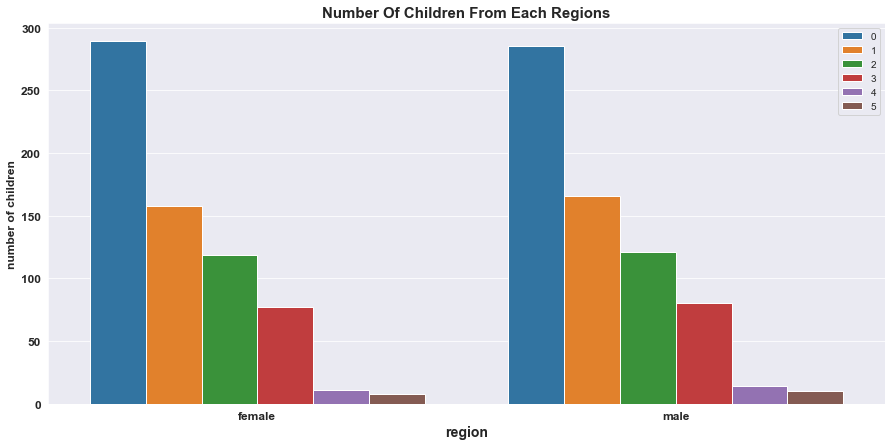

In [344]:
plt.figure(figsize=(15, 7))
sns.countplot(x='sex', data=insurance, hue='children') #order=order)
plt.title('Number Of Children From Each Regions', fontsize=15, fontweight='bold')
plt.xlabel('region',fontsize=14, fontweight='bold')
plt.ylabel('number of children',fontsize=12, fontweight='bold')
plt.legend(loc='upper right')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')

# show thw plot
plt.show()

#### Conclusion: Understanding the Dynamics of Insurance Costs

The analysis of the insurance dataset has provided valuable insights into the factors that influence insurance costs. This dataset, which includes information on age, BMI, smoking status, and insurance premiums, allowed us to explore and draw several key conclusions:

#### Age and Insurance Costs:
We observed a clear positive correlation between age and insurance costs. As individuals grow older, their insurance premiums tend to increase significantly. This age-related trend suggests that age is a substantial driver of insurance costs.

#### BMI and Insurance Costs:
BMI also plays a role in determining insurance premiums. Higher BMI levels are associated with higher insurance costs. This finding underscores the importance of maintaining a healthy weight for managing healthcare expenses.

#### Smoking Status and Insurance Costs:
Smoking status emerged as one of the most significant factors influencing insurance premiums. Smokers consistently pay higher insurance premiums compared to non-smokers. This demonstrates the considerable impact of smoking habits on healthcare expenses.

#### Gender and Geographical Differences:
While the analysis did not explicitly focus on gender and geographical variations, these factors can further contribute to differences in insurance costs. Future studies may explore these aspects in greater detail.

#### Recommendations:
Based on the findings, it is advisable for individuals to consider the impact of factors like age, BMI, and smoking status when evaluating insurance options. Making healthy lifestyle choices can not only improve overall well-being but also lead to potential cost savings on insurance premiums.

#### Further Research:
This analysis provides a solid foundation for future research in the insurance industry. Exploring additional factors, such as pre-existing medical conditions, family history, and regional differences, can enhance our understanding of insurance cost dynamics.

In conclusion, this analysis sheds light on the complex relationship between various factors and insurance costs. It underscores the importance of informed decision-making when choosing insurance plans and highlights the potential for lifestyle changes to positively impact healthcare expenses. 